# Taller Interactivo: Árboles de Decisión y Evaluación de Modelos

## Caso de Estudio: Social_Network_Ads

Este taller profesional se centra en la construcción, interpretación y evaluación de un modelo de Árbol de Decisión utilizando el dataset _Social_Network_Ads_. Se evaluarán aspectos técnicos y se comparará el desempeño con un modelo de Regresión Logística, analizando métricas de evaluación y posibles indicadores de sobreajuste.

## 2. Objetivos del Taller

En este taller se pretende:
- Comprender los fundamentos teóricos de los árboles de decisión.
- Realizar un análisis exploratorio y revisión de datos.
- Aplicar la estratificación en el particionado de datos.
- Entrenar y evaluar un modelo de Árbol de Decisión.
- Visualizar y analizar la matriz de confusión y la curva ROC.
- Ajustar el modelo para controlar la complejidad y el sobreajuste.
- Promover el análisis crítico de los resultados obtenidos.

## 3. Carga del Dataset y Primer Análisis

En esta sección se carga el dataset _Social_Network_Ads_ desde una URL y se visualizan las primeras filas y la información general. Esto permitirá conocer la estructura de los datos y los tipos de variables presentes.

In [ ]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv

--2025-10-23 00:04:48--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2025-10-23 00:04:48 (31.3 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')
df = pd.DataFrame(data, columns=['Age', 'EstimatedSalary', 'Purchased'])
df['Age'] = df['Age'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)
df['Purchased'] = df['Purchased'].astype(int)

In [43]:
data = pd.read_csv('Social_Network_Ads.csv')
df = pd.DataFrame(data, columns=['Age', 'EstimatedSalary', 'Purchased'])


Accuracy: 0.8900
Precision: 0.8378
Recall: 0.8611
F1-Score: 0.8493


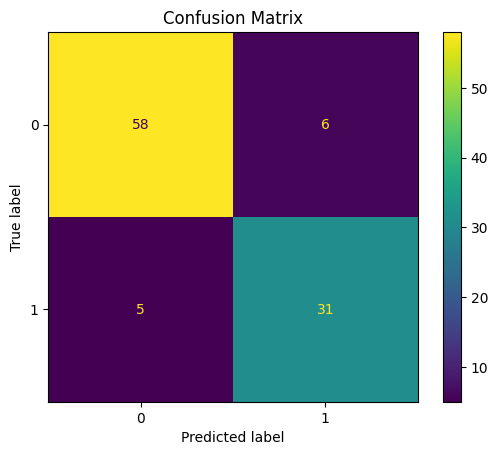

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Make predictions on the test set
y_pred = dt_model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Mostrar las primeras filas

print("primeras filas del dataset:")
display(df.head())

primeras filas del dataset:


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## 4. Revisión de Variables y Tipos de Datos

Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el análisis y el modelado.

En la base de datos podemos encontrar 3 variables, edad, salario estimado y el nivel de ingresos, la edad es muy relevante ya que por medio deesta podemos determinar como va a ser el comportamiento de compra del cliente, el salario estimado representa el nivel de ingresos que tiene cada uno de los usuarios, lo que representaría su capacidad adquisitiva y también la disposición para gastar en ciertos productos. con lo anterior tenemos la información suficiente para poder hacer una predicción a futuro.

In [20]:
print("Column names and data types:")
print(df.dtypes)

Column names and data types:
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object


## 5. Visualización de la Distribución de la Variable Objetivo

Visualiza la distribución de la variable `Purchased` usando un gráfico de barras. Esto permitirá identificar si existe un balance entre las clases.

**Pregunta para el grupo:**
- ¿La variable `Purchased` se encuentra balanceada? ¿Qué implicaciones podría tener un desequilibrio en la modelación?

In [22]:
pd.DataFrame(df['Purchased'].value_counts())

,count
Purchased,
0,257
1,143


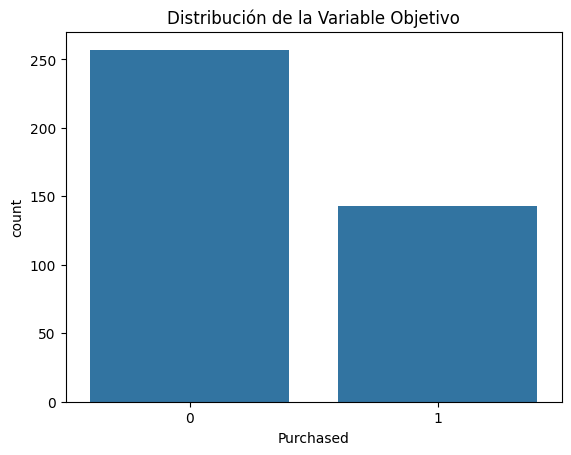

In [23]:
sns.countplot(x='Purchased', data=df)
plt.title('Distribución de la Variable Objetivo')
plt.show()

Según el gráfico, la variable purchased no está balanceada, ya que hay mas usuarios que no compraron que los que si, esto genera un desequilibrio provocando un sesgo hacia la clase mayoritaria, lo que conlleva a un rendimiento deficiente al predecir la clase minotaria.

## 6. Análisis de la Distribución y Reflexión

Discute la distribución observada. Reflexiona sobre cómo un posible desbalance podría afectar la performance del modelo y qué estrategias se podrían utilizar para mitigarlo (por ejemplo, SMOTE en otros casos).

Como pudimos ver en el gráfico anterior, vemos que la variable de compra está desequilibrada, con más casos de no compra que con los de compra. esto genera que el modelo tenga muchos sesgos.
Una de las estratégias que se pueden implementar es SMOTE, ya que usa métricas de evaluación adecuadas como la precisión, recall, F1-score, AUC o algoritmos menos sensibles.


## 7. Selección de Variables para el Modelo

Para este taller, se utilizarán las variables `Age` y `EstimatedSalary` como características para predecir `Purchased`.

**Pregunta:**
- ¿Por qué considerarían estas dos variables relevantes para predecir la compra?

Ya que como lo había mencionado anteriormente, es por que con la edad, (Según su rango) se puede ver el comportamiento de compra y junto a la variable valor de los ingresos estimados, determinan cuál es el nivel de los gastos y si estarían dispuestos a comprar otro producto (teniendo en cuenta el nivel de ingresos y la capacidad adquisitiva que la persona tenga).

## 8. División de Datos: Entrenamiento y Prueba

Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

**Pregunta:**
- ¿Qué ventajas ofrece la estratificación al dividir el dataset?

In [26]:
X = df[['Age', 'EstimatedSalary']]
y = df["Purchased"]



In [35]:
train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

[     Age  EstimatedSalary
 352   42            90000
 311   39            96000
 85    31           118000
 179   31            34000
 235   46            79000
 ..   ...              ...
 4     19            76000
 323   48            30000
 314   39            79000
 170   21            88000
 106   26            35000
 
 [300 rows x 2 columns],
      Age  EstimatedSalary
 315   39            75000
 349   38            61000
 358   40            71000
 200   35            39000
 265   42           108000
 ..   ...              ...
 127   26            32000
 209   46            22000
 74    32            18000
 122   40            75000
 381   48            33000
 
 [100 rows x 2 columns],
 352    1
 311    1
 85     1
 179    0
 235    1
       ..
 4      0
 323    1
 314    0
 170    0
 106    0
 Name: Purchased, Length: 300, dtype: int64,
 315    1
 349    0
 358    1
 200    0
 265    1
       ..
 127    0
 209    0
 74     0
 122    0
 381    1
 Name: Purchased, Length: 100, dt

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [37]:
print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de prueba:", x_test.shape)

print("\nProporción de clases en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nProporción de clases en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Tamaño del conjunto de entrenamiento: (300, 2)
Tamaño del conjunto de prueba: (100, 2)

Proporción de clases en el conjunto de entrenamiento:
Purchased
0    0.643333
1    0.356667
Name: proportion, dtype: float64

Proporción de clases en el conjunto de prueba:
Purchased
0    0.64
1    0.36
Name: proportion, dtype: float64


La estratificación garantiza que tanto los conjuntos de entrenamiento como los de prueba tengan la misma proporción de cada clase que el conjunto de datos original. Esto es crucial para datos desbalanceados, ya que previene modelos sesgados y proporciona una evaluación más confiable del rendimiento en datos no vistos, especialmente para la clase minoritaria.

## 9. Entrenamiento Inicial del Modelo de Árbol de Decisión

Se entrenará un modelo de Árbol de Decisión sin restricciones de profundidad utilizando el conjunto de entrenamiento.

**Pregunta:**
- ¿Qué implica entrenar un modelo sin restricciones de profundidad en términos de complejidad y riesgo de sobreajuste?

In [44]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
ir_model = DecisionTreeClassifier(random_state=42)
ir_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

 esto significa que el árbol puede crecer mucho, creando un modelo altamente complejo. Esta complejidad permite que el modelo se ajuste muy de cerca a los datos de entrenamiento, pudiendo captar ruido y valores atípicos. Esto incrementa significativamente el riesgo de sobreajuste, donde el modelo tiene un rendimiento excepcional en los datos de entrenamiento pero pobre en datos de prueba no vistos porque ha memorizado los ejemplos de entrenamiento en lugar de aprender los patrones subyacentes.

## 10. Evaluación del Modelo: Análisis de Métricas

Analizaremos las métricas de evaluación obtenidas (exactitud, precisión, recall, F1-Score) y la matriz de confusión.

**Pregunta:**
- ¿Qué información específica nos aporta la matriz de confusión respecto a los errores del modelo?

In [47]:
y_pred = dt_model.predict(x_test)
y_pred_ir = ir_model.predict(x_test)

print("Decision Tree Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Decision Tree Model:
Accuracy: 0.89
Precision: 0.8378378378378378
Recall: 0.8611111111111112
F1-Score: 0.8493150684931506


Text(0.5, 1.0, 'Decision Tree Model (no restrictions)')

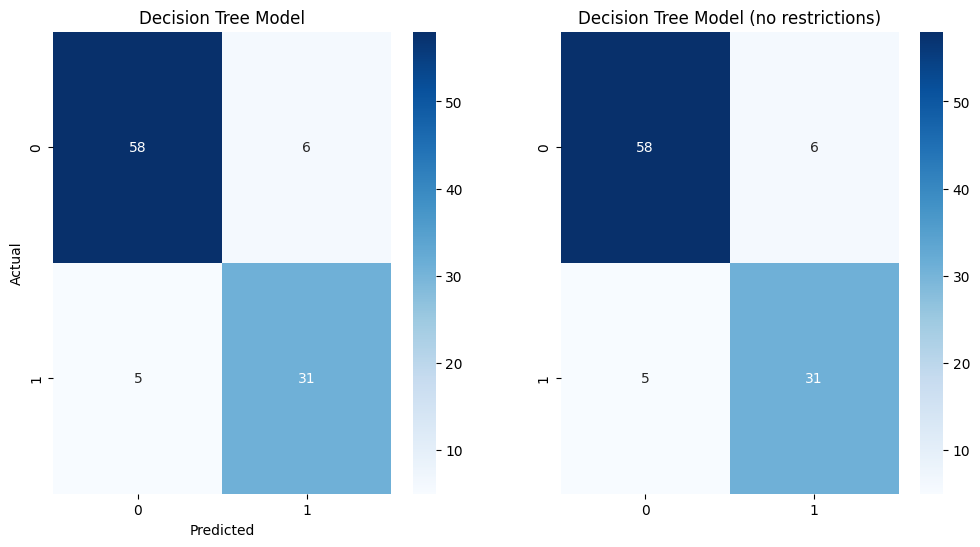

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Decision Tree Model')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, y_pred_ir), annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Decision Tree Model (no restrictions)')


La matriz de confusión muestra específicamente dos tipos de errores:Falsos positivos (celda superior derecha): el modelo predijo una compra, pero el usuario en realidad no compró.Falsos negativos (celda inferior izquierda): el modelo predijo que no habría compra, pero el usuario en realidad sí compró.Estos valores nos indican cuántas veces el modelo cometió cada tipo específico de predicción incorrecta.

## 11. Visualización de la Curva ROC y Cálculo del AUC

Genera la curva ROC y calcula el AUC para evaluar la capacidad discriminativa del modelo.

**Pregunta:**
- ¿Cómo interpretan la curva ROC y qué indica un valor de AUC alto o bajo?

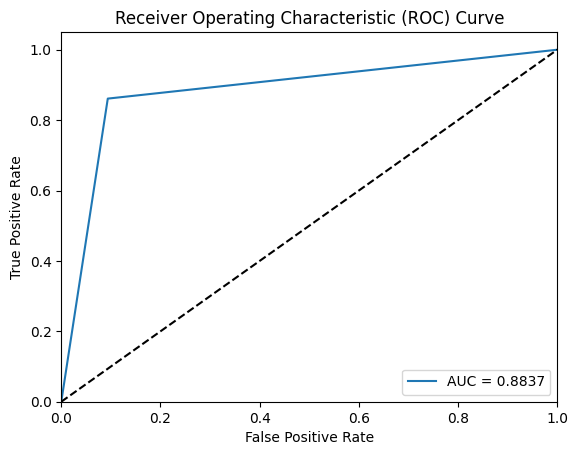

AUC: 0.8837


In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities of the positive class
y_pred_proba = dt_model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {auc:.4f}")

## 12. Visualización e Interpretación del Árbol de Decisión

Exporta y visualiza el árbol de decisión utilizando GraphViz y pydotplus. Analiza la estructura, las reglas y la importancia de cada nodo.

**Preguntas:**
- ¿Cuál es la regla de decisión en el primer nodo?
- ¿Cómo se interpretan las ramas y las hojas en relación a las variables `Age` y `EstimatedSalary`?
- ¿Qué partes del árbol podrían estar contribuyendo al sobreajuste?

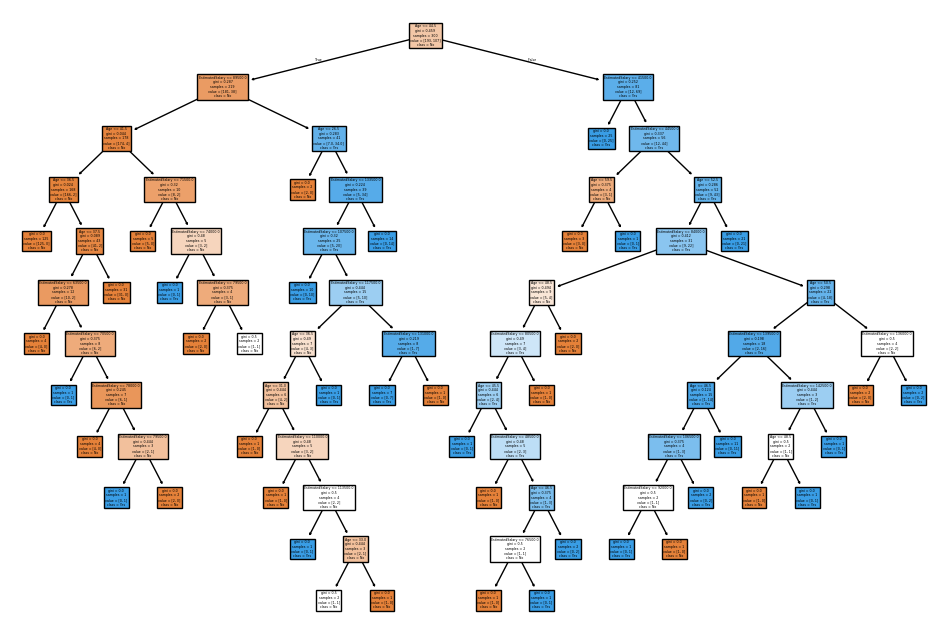

In [59]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=['Age', 'EstimatedSalary'], class_names=['No', 'Yes'])
plt.show()

## 13. Análisis Crítico del Modelo Inicial

Revisa los resultados obtenidos en el modelo sin restricciones y discute:
- ¿Existen indicios de sobreajuste? ¿Cómo se comparan las métricas entre entrenamiento y prueba?
- ¿Qué mejoras se podrían implementar para optimizar la generalización del modelo?

Sobreajuste y Mejora de la Generalización (Modelo Ilimitado):Señales de Sobreajuste: La principal señal de sobreajuste en el modelo ilimitado sería si sus métricas de rendimiento (como la precisión) son significativamente más altas en los datos de entrenamiento en comparación con los datos de prueba. La estructura compleja y profunda del árbol en sí es un indicador visual de su potencial para sobreajustarse.Mejoras para la Generalización: Para lograr que el modelo generalice mejor a nuevos datos y reducir el sobreajuste, se deben utilizar técnicas de regularización al entrenar el Árbol de Decisión. Las formas más concretas son:- Limitar la profundidad máxima (max_depth).- Establecer el número mínimo de muestras requeridas para dividir un nodo (min_samples_split).- Establecer el número mínimo de muestras requeridas en un nodo hoja (min_samples_leaf). Estos métodos restringen el crecimiento y la complejidad del árbol.

## 14. Ajuste del Modelo: Control de la Profundidad

Entrena un segundo modelo de Árbol de Decisión limitando la profundidad (por ejemplo, `max_depth=5`) y evalúa su desempeño.

**Pregunta:**
- ¿Qué cambios se observan en las métricas al limitar la profundidad del árbol? ¿Cómo afecta esto a la capacidad del modelo de generalizar?

Decision Tree Model (Limited Depth):
Accuracy: 0.8900
Precision: 0.8571
Recall: 0.8333
F1-Score: 0.8451


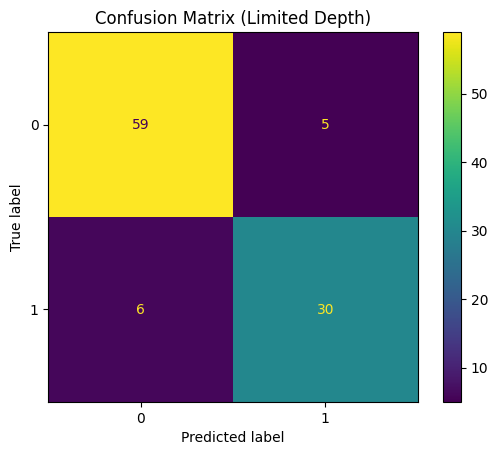

In [61]:
# Train a second Decision Tree model with limited depth
dt_model_limited = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_limited.fit(x_train, y_train)

# Make predictions with the limited depth model
y_pred_limited = dt_model_limited.predict(x_test)

# Evaluate the limited depth model
accuracy_limited = accuracy_score(y_test, y_pred_limited)
precision_limited = precision_score(y_test, y_pred_limited)
recall_limited = recall_score(y_test, y_pred_limited)
f1_limited = f1_score(y_test, y_pred_limited)

print("Decision Tree Model (Limited Depth):")
print(f"Accuracy: {accuracy_limited:.4f}")
print(f"Precision: {precision_limited:.4f}")
print(f"Recall: {recall_limited:.4f}")
print(f"F1-Score: {f1_limited:.4f}")

# Display the confusion matrix for the limited depth model
cm_limited = confusion_matrix(y_test, y_pred_limited)
disp_limited = ConfusionMatrixDisplay(confusion_matrix=cm_limited)
disp_limited.plot()
plt.title('Confusion Matrix (Limited Depth)')
plt.show()

Limitar la profundidad del Árbol de Decisión reduce la complejidad del modelo, lo que puede cambiar las métricas de rendimiento. De manera crucial, una profundidad limitada generalmente conduce a una mejor generalización a datos no vistos al evitar que el modelo se sobreajuste a los datos de entrenamiento.

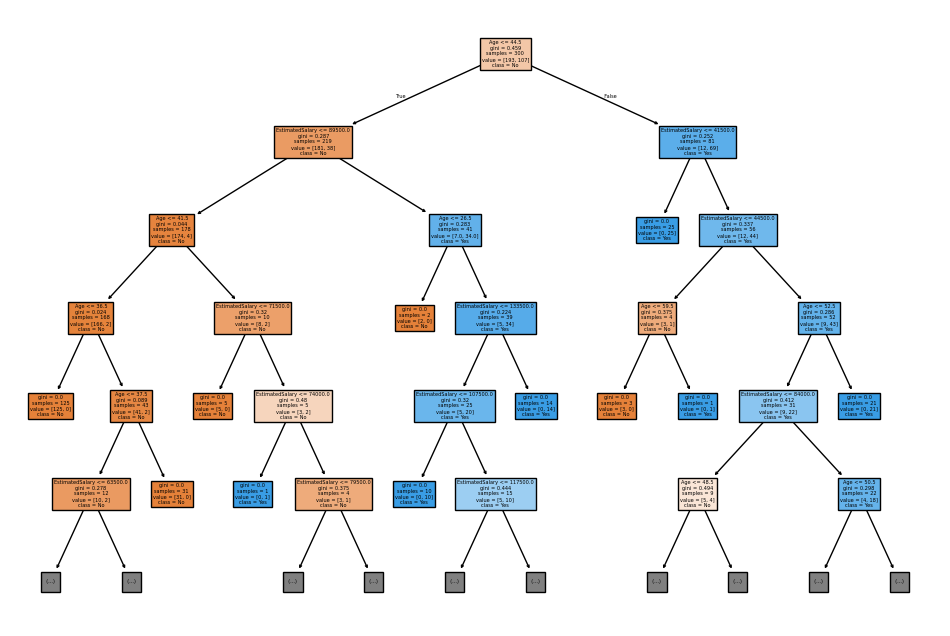

In [60]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=['Age', 'EstimatedSalary'], class_names=['No', 'Yes'], max_depth=5)
plt.show()

## 15. Discusión Final y Comparación de Modelos

Analiza y compara los resultados obtenidos del modelo inicial y el modelo ajustado. Reflexiona sobre los siguientes aspectos:
- ¿Cuál de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?
- ¿Qué indicios sugieren un mejor comportamiento frente al sobreajuste?
- ¿Qué otros modelos (por ejemplo, Regresión Logística) podrían utilizarse como referencia para evaluar el desempeño?

Utiliza estos puntos para guiar una discusión profesional y técnica entre los participantes.

1. Balance entre complejidad e interpretabilidad: El modelo con profundidad limitada (max_depth=5) ofrece un mejor balance. Es menos complejo y, por lo tanto, más fácil de interpretar que el árbol sin restricciones.
2. Mejor comportamiento frente al sobreajuste: El modelo con profundidad limitada generalmente muestra un mejor comportamiento frente al sobreajuste porque su menor complejidad le permite generalizar mejor a datos no vistos.
3. Otros modelos de referencia: La Regresión Logística es un buen modelo de referencia para evaluar el desempeño. Es un modelo más simple y lineal que puede ayudar a entender el valor de un enfoque de árbol de decisión.